In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nose.tools
# Write your imports here
import numpy as np

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. Data mining process as a whole

### Income information
Read the dataset located [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data). The information file is [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Save it into the variable `income_data`. Change the column names to what you like. The last column is related to the income class.

Get acquainted with the information file well before starting work.

You don't need to clean the dataset.

In [3]:
#1
# Reading from URL file. Data is separated by comma and has not Header
income_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header = None, skipinitialspace= True)
# Giving meaningful column names, as per the `auto_mpg.names` file
income_data = income_data.rename(columns={0: "age",1: "workclass", 2: "fnlwgt", 3: "education", 4: "education_num", 5: "marital_status", 6: "occupation", 7: "relationship", 8: "race", 9: "sex", 10: "capital_gain", 11: "capital_loss", 12: "hours_per_week", 13:"native_country", 14: "income"})
#income_data['income'] = income_data['income'].map({' <=50K': 0, ' >50K': 1}).astype(int) #convert type to int

In [4]:
nose.tools.assert_is_not_none(income_data)

How many people have high income (over 50 000 USD per year)? Write a function to return the value. The function should accept the dataframe as a parameter. Work with that parameter.

In [5]:
#2
def get_num_people_with_high_income(dataframe):
    #num_people = dataframe['income'][dataframe['income'] == ' >50K'].count() # избирам филтър 
    num_people = dataframe.groupby(['income']).size()[1] #list second row
    return num_people
num_people = get_num_people_with_high_income(income_data)
print(num_people)

7841


In [6]:
# This cell contains hidden tests

In [7]:
num_people = get_num_people_with_high_income(income_data)
nose.tools.assert_equal(num_people, 7841)

Plot a histogram of the capital gain. You can see that there are many people with relatively low gains and a few people - with very high gains.

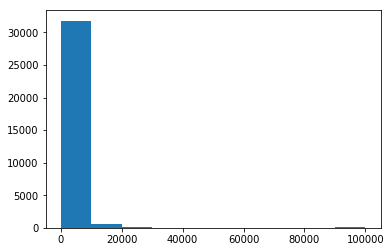

In [8]:
#3
values = income_data['capital_gain']
plt.hist(values)
plt.show()

Write a function which accepts a dataframe and a capital gain value (in USD) and returns how many people are there with **greater than or equal to** that threshold gain.

In [9]:
#3
def get_num_people_with_higher_gain(dataframe, threshold_gain):
    highpayed = len(dataframe[dataframe.capital_gain >= threshold_gain]) # put the threshold_gain
    return highpayed
highpayed = get_num_people_with_higher_gain(income_data, 60000)
print(highpayed)

159


In [10]:
nose.tools.assert_equal(get_num_people_with_higher_gain(income_data, 60000), 159)

Create a pie chart of the number of people by marital status.

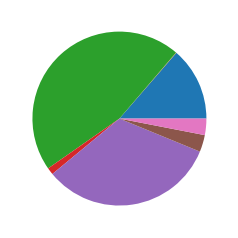

In [11]:
#4
values = income_data['marital_status'].value_counts().sort_index()
plt.gca().set_aspect("equal")
plt.pie(values)
plt.show()

Which type of marital status is the most prominent (i.e. has the most people)? How many are there? Write a function that **calculates and returns the two answers**. 

In [12]:
#4
def most_prominent_marital_status(dataframe):
    status = dataframe['marital_status'].value_counts().sort_index().sort_values(ascending=False).index[0] # get the first row of sorted values for marital status
    num_people = dataframe['marital_status'].value_counts().sort_index().sort_values(ascending=False).values[0] # get the first row value of sorted values for marital status
    return status, num_people
print(most_prominent_marital_status(income_data))

('Married-civ-spouse', 14976)


In [13]:
(status, num_people) = most_prominent_marital_status(income_data)
nose.tools.assert_not_equal(status, "")
nose.tools.assert_greater(num_people, 10000)

Create a histogram of all people's ages. Use the default settings. Add the label "Age" on the x-axis and "Count" on the y-axis.

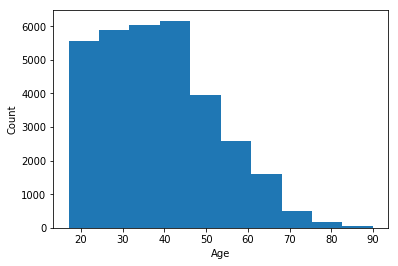

In [14]:
#5
values = income_data['age']
plt.xlabel("Age")
plt.ylabel("Count")
plt.hist(values)
plt.show()

Let's get another view of the data. Split the ages into three:
1. Young people: $\text{age} <= 30$
2. Middle-aged people: $30 < \text{age} <= 60$
3. Old people: $60 < \text{age}$

Return the counts in the following function. Which age group has the most people? How many are there?

In [15]:
#7
def get_num_people_by_age_category(dataframe):
    #young, middle_aged, old = (len(dataframe[ dataframe.age <=30]), len(dataframe[(dataframe.age >30) & (dataframe.age <=60)]), len(dataframe[ dataframe.age >60]))
    young = dataframe['age'][dataframe['age'] <= 30].count()
    middle_aged = dataframe['age'][(dataframe.age > 30) & (dataframe.age <= 60)].count()
    #middle_aged = dataframe['age'][(dataframe.age <= 60)].count()
    old = dataframe['age'][dataframe['age'] > 60].count()
    return young, middle_aged, old
print(get_num_people_by_age_category(income_data))

(10572, 19657, 2332)


In [16]:
young, middle_aged, old = get_num_people_by_age_category(income_data)
nose.tools.assert_greater(young, 0)
nose.tools.assert_greater(middle_aged, 0)
nose.tools.assert_greater(old, 0)

Now we can create a bar chart. Execute the code below to see it.

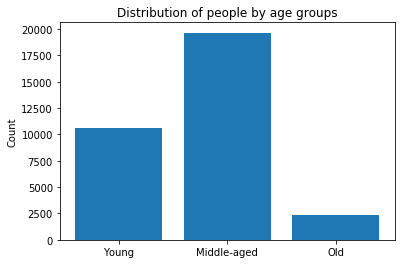

In [17]:
plt.title("Distribution of people by age groups")
plt.bar(range(3), [young, middle_aged, old])
plt.xticks(range(3), ["Young", "Middle-aged", "Old"])
plt.ylabel("Count")
plt.show()

Have a look at the native country of the people. The highest number of people are, as expected, from the US. What country makes for **the second highest** number of people? How many are they? Write a function to **calculate** and return the answer given a dataframe. DO NOT hardcode the answer, e.g. `return "Germany"`.

In [18]:
#8
def get_second_highest_num_people(dataframe):
    num_people = dataframe['native_country'].value_counts().sort_index().sort_values(ascending=False).values[1]# get the second row of sorted values for marital status
    country = dataframe['native_country'].value_counts().sort_index().sort_values(ascending=False).index[1] # get the second row value of sorted values for marital status
    return num_people, country
print(get_second_highest_num_people(income_data))

(643, 'Mexico')


In [19]:
num_people, country = get_second_highest_num_people(income_data)
nose.tools.assert_greater(num_people, 0)
nose.tools.assert_not_equal(country, "")

Which people are most overworked? Group all data by occupation and calculate the mean hours per week for each group.

Write a function that **calculates and returns** all mean hours per week as a `Series`. Sort the results in descending order (most hours to fewestt hours).

In [20]:
#9
def get_mean_working_hours_by_income(dataframe):
    hours = dataframe.groupby(['occupation'])['hours_per_week'].mean().sort_values(ascending=False) # calculate average values for each occupation
    return hours
print(get_mean_working_hours_by_income(income_data))

occupation
Farming-fishing      46.989940
Exec-managerial      44.987703
Transport-moving     44.656230
Protective-serv      42.870570
Prof-specialty       42.386715
Craft-repair         42.304221
Sales                40.781096
Machine-op-inspct    40.755744
Armed-Forces         40.666667
Tech-support         39.432112
Handlers-cleaners    37.947445
Adm-clerical         37.558355
Other-service        34.701669
Priv-house-serv      32.885906
?                    31.906131
Name: hours_per_week, dtype: float64


In [21]:
hours = get_mean_working_hours_by_income(income_data)
print(hours)
nose.tools.assert_almost_equal(hours["Handlers-cleaners"], 37.95, delta = 0.01)

occupation
Farming-fishing      46.989940
Exec-managerial      44.987703
Transport-moving     44.656230
Protective-serv      42.870570
Prof-specialty       42.386715
Craft-repair         42.304221
Sales                40.781096
Machine-op-inspct    40.755744
Armed-Forces         40.666667
Tech-support         39.432112
Handlers-cleaners    37.947445
Adm-clerical         37.558355
Other-service        34.701669
Priv-house-serv      32.885906
?                    31.906131
Name: hours_per_week, dtype: float64


Finally, let's plot a bar chart. Check the values carefully. If your do not match, feel free to edit the chart generation code below.

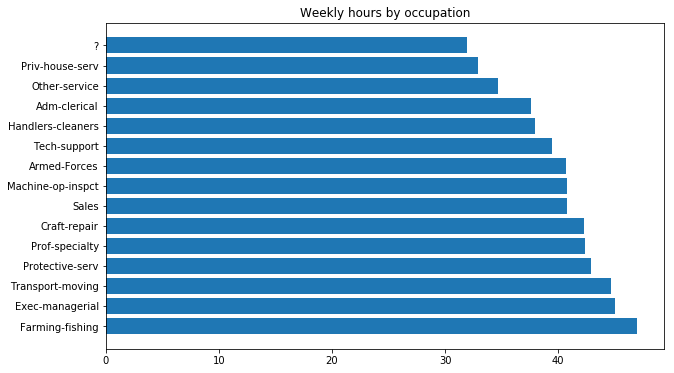

In [22]:
plt.figure(figsize = (10, 6))
plt.title("Weekly hours by occupation")
plt.barh(range(len(hours)), hours)
plt.yticks(list(range(len(hours))), hours.index)
plt.show()